In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy
import xml.etree.ElementTree as ET
from glob import glob
import datetime
import ipywidgets as widgets
import glob
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#File selection & read¶
fto = []
for f in glob.iglob('/storage/experiments/2020/1204_ABSJets/Liulin/*.s*'): 
    fto.append(f)
    
w = widgets.Select(
    options=fto,
    rows=len(fto),
    layout={'width': 'max-content'},
    description='File:',
    disabled=False
)

display(w)

Select(description='File:', layout=Layout(width='max-content'), options=('/storage/experiments/2020/1204_ABSJe…

In [3]:
filename = w.value
f = open(filename)
lines = f.readlines()[2:]
f.close()

In [4]:
data_dict = {"dtime": [], "dose": [], "flux": [], "Sum(eventN*ChanellN)": [], "sum_event": [], "sss": [], "bins": []}
for line in lines:
    if line[2] == "/":
        splitted = line.split()
        dt = datetime.datetime.strptime(splitted[0] + " " + splitted[1], "%d/%m/%y %H:%M:%S")
        data_dict["dtime"].append(dt)
        data_dict["dose"].append(float(splitted[4]))
        data_dict["flux"].append(float(splitted[7]))
        data_dict["Sum(eventN*ChanellN)"].append(float(splitted[8]))
        data_dict["sum_event"].append(float(splitted[9]))
        data_dict["sss"].append(float(splitted[10]))
    else:
        data_dict["bins"].append(np.array(line.split()).astype(int))

In [5]:
liulin = pd.DataFrame(data_dict)
liulin.head(10)

,dtime,dose,flux,Sum(eventN*ChanellN),sum_event,sss,bins
0,2020-12-04 05:13:30,0.604295,0.10,18.0,2.0,0.001679,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2020-12-04 05:13:40,0.268576,0.15,8.0,3.0,0.002425,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2020-12-04 05:13:50,0.335720,0.15,10.0,3.0,0.003357,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2020-12-04 05:14:00,0.000000,0.00,0.0,0.0,0.003357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2020-12-04 05:14:10,0.000000,0.00,0.0,0.0,0.003357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,2020-12-04 05:14:20,0.000000,0.00,0.0,0.0,0.003357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,2020-12-04 05:14:30,0.000000,0.00,0.0,0.0,0.003357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,2020-12-04 05:14:40,0.000000,0.00,0.0,0.0,0.003357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,2020-12-04 05:14:50,0.302148,0.05,9.0,1.0,0.004196,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
9,2020-12-04 05:15:00,0.235004,0.05,7.0,1.0,0.004849,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
a=liulin.loc[28473,'sss']
sumsum=np.cumsum(liulin["Sum(eventN*ChanellN)"])
sumsum=sumsum/sumsum[28473]*a
sumsum.head(10)

0    0.001679
1    0.002425
2    0.003357
3    0.003357
4    0.003357
5    0.003357
6    0.003357
7    0.003357
8    0.004197
9    0.004849
Name: Sum(eventN*ChanellN), dtype: float64

In [7]:
WINDOW = 100
liulin['flux_mean'] = liulin['sum_event'].rolling(WINDOW).mean()
liulin.head(15)
liulin.index = liulin['dtime']

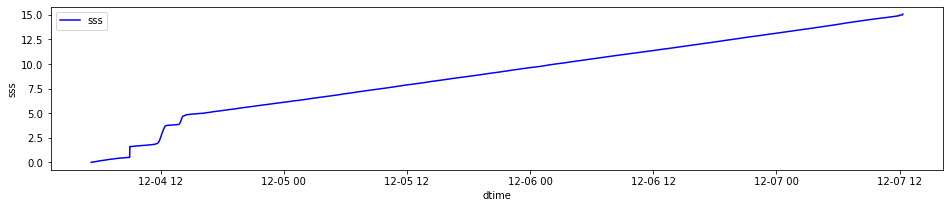

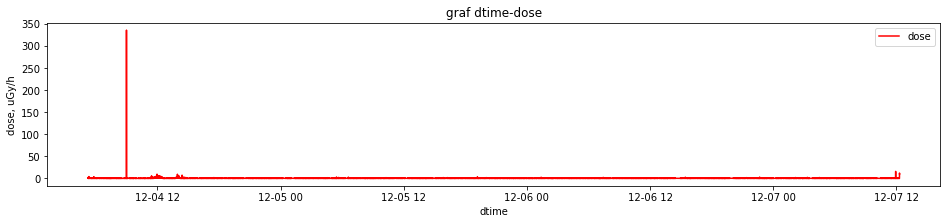

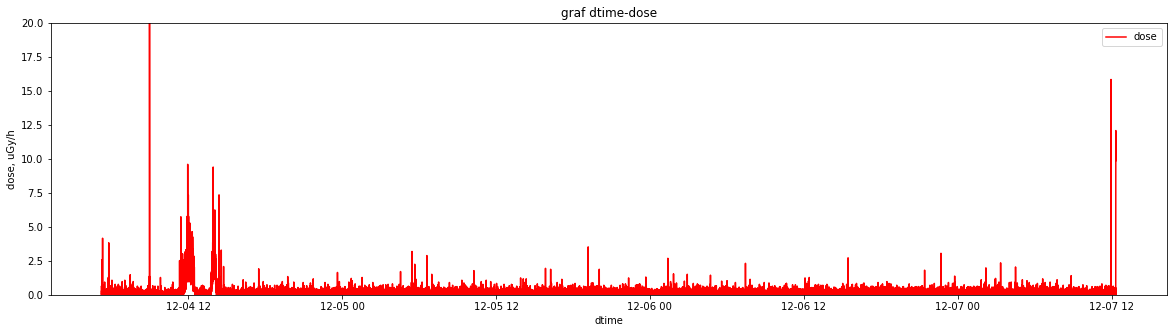

In [8]:
plt.rcParams["figure.figsize"] = [16,3]
plt.plot(liulin["sss"],'b-',label="sss")
plt.xlabel('dtime')
plt.ylabel('sss')
plt.legend()
plt.show()

plt.plot(liulin["dose"],'r-',label="dose")
plt.title('graf dtime-dose')
plt.xlabel('dtime')
plt.ylabel('dose, uGy/h')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(liulin["dose"],'r-',label="dose")
plt.title('graf dtime-dose')
plt.xlabel('dtime')
plt.ylabel('dose, uGy/h')
plt.legend()
plt.ylim(0, 20)
plt.show()

In [9]:
#za čas letu
e1 = ['2020-12-04 11:00:00','2020-12-04 14:00:00']
e1

['2020-12-04 11:00:00', '2020-12-04 14:00:00']

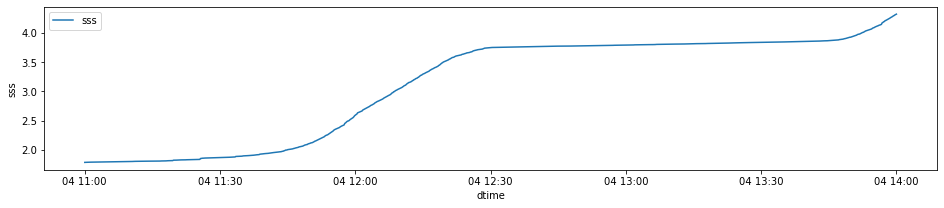

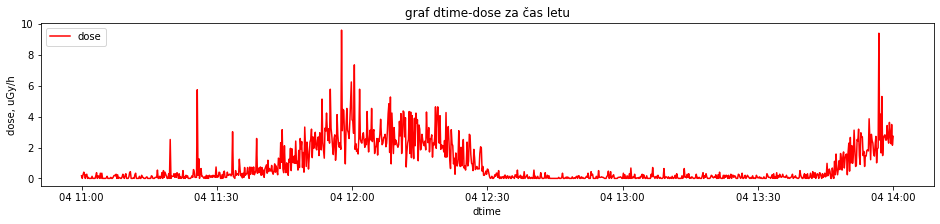

In [10]:
plt.plot(liulin["sss"][e1[0]:e1[1]],label="sss")
plt.xlabel('dtime')
plt.ylabel('sss')
plt.legend()
plt.show()

plt.plot(liulin["dose"][e1[0]:e1[1]],'r-',label="dose")
plt.title('graf dtime-dose za čas letu')
plt.xlabel('dtime')
plt.ylabel('dose, uGy/h')
plt.legend()
plt.show()

(0, 20)

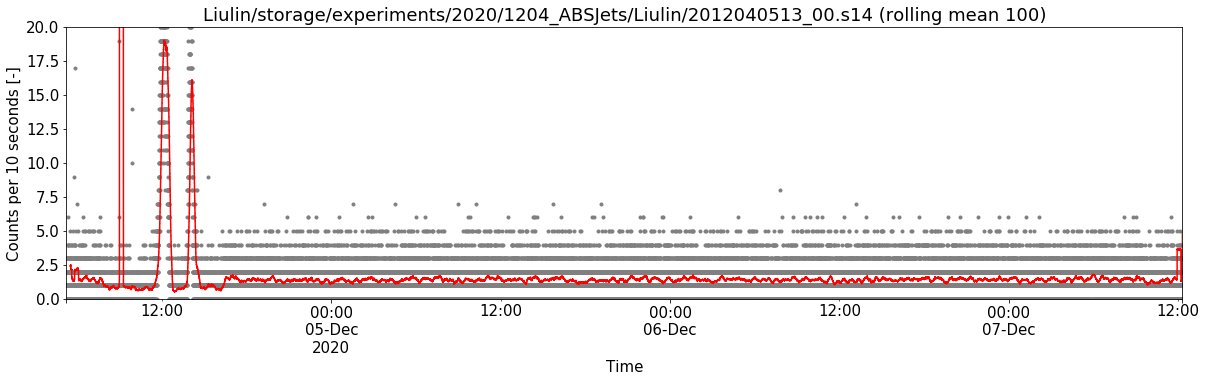

In [11]:
plt.figure(figsize=(20, 5))
matplotlib.rcParams.update({'font.size': 15})
liulin['sum_event'].plot(linestyle='', marker='.',color='gray')
liulin['flux_mean'].plot(drawstyle='steps', color='red')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts per 10 seconds [-]')
plt.xlabel('Time')
plt.ylim(0, 20)

In [12]:
liulin_bins = pd.DataFrame(stack(liulin['bins']))
liulin_bins.index = liulin['dtime']
liulin_bins

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
dtime,,,,,,,,,,,,,,,,,,,,,
2020-12-04 05:13:30,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 05:13:40,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 05:13:50,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 05:14:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 05:14:10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07 12:18:20,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-07 12:18:30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-07 12:18:40,0,0,65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
LOW_ENERGY = 0

e1 = ['2020-12-04 11:00:00','2020-12-04 14:00:00']
ener1 = liulin_bins[e1[0]:e1[1]].sum()

e = pd.DataFrame()
e['1'] = ener1[:256]
e['index'] = ener1[:256].index
e['x'] =  linspace(0.0814/2, 20.7977, 256)
e.head()

,1,index,x
0,0,0,0.0407
1,381,1,0.1221
2,2314,2,0.2035
3,1028,3,0.2849
4,603,4,0.3663


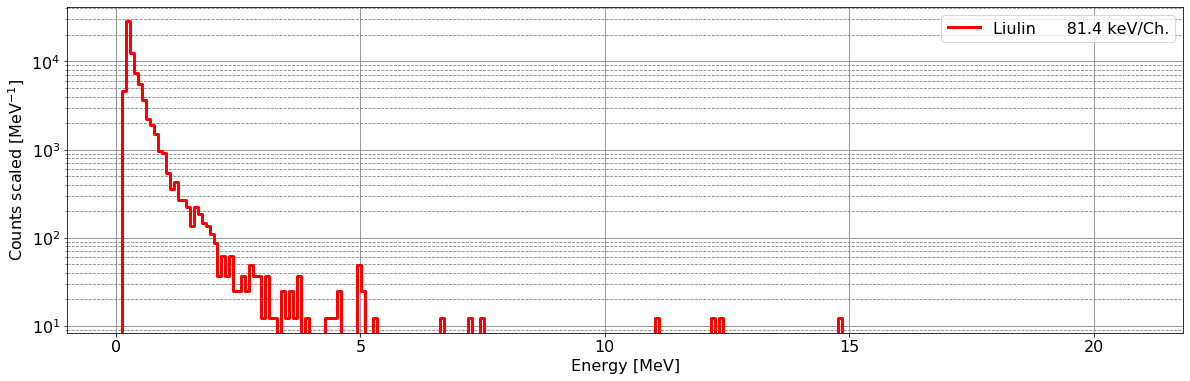

In [14]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(20,6))

e['norm'] = e['1']/0.0814 #/0.0692 #/(0.0814/0.0494)

plt.plot(e['x'],e['norm'], c='r', lw=3, drawstyle='steps-post', label='Liulin      81.4 keV/Ch.')

#plt.ylim(1, 10e6)
#plt.xlim(0, 13)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
#plt.title('Aircraft')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

plt.savefig("aircraft_spectra.pdf", format="pdf", bbox_inches='tight')

In [15]:
liulin_fly=liulin_bins[e1[0]:e1[1]]
liulin_fly

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
dtime,,,,,,,,,,,,,,,,,,,,,
2020-12-04 11:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 11:00:10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 11:00:20,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 11:00:30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 11:00:40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04 13:59:20,0,0,8,5,1,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 13:59:30,0,0,7,2,3,4,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-04 13:59:40,0,1,12,2,2,3,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0


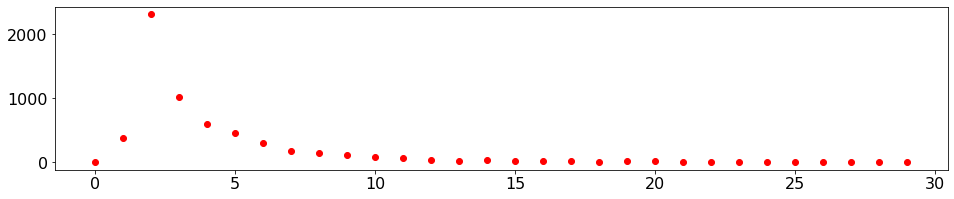

In [16]:
sum_bins=liulin_fly.sum().to_numpy()
plt.plot(sum_bins[0:30],'ro')
plt.show()